In [0]:
#Dataset source: Kaggle 

In [0]:
from fastai import *
from fastai.tabular import *

In [3]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [0]:
path=Path('diabetes_data')

In [5]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
dep_var='Outcome'
cat_names=''
cont_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
procs=[FillMissing,Categorify,Normalize]

In [0]:
test = TabularList.from_df(df.iloc[500:600].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data=(TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
     .split_by_idx(list(range(500,600)))
      
     .label_from_df(cols=dep_var)
      .add_test(test)
     .databunch())

In [9]:
data.show_batch(rows=5)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
1.8349,-1.7036,1.8949,0.1550,-0.2693,0.4292,-0.5618,1.1978,0
-0.5480,-0.9460,-0.3722,0.4729,-0.6862,-0.0575,-1.0219,-0.7842,0
-1.1437,0.2850,0.9675,-1.3076,-0.6862,-0.0575,0.7978,-0.0948,1
0.9413,1.8633,0.7614,0.0278,0.9473,0.4792,0.3317,1.5424,1
0.9413,0.9479,0.9675,1.4904,-0.6862,2.2390,-0.4075,0.2499,1


In [0]:
learn=tabular_learner(data, layers=[300,200,100], metrics=accuracy)

In [17]:
learn.fit(1,1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.519265,0.353410,0.870000,00:00


In [0]:
learn.save('stage-1')

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


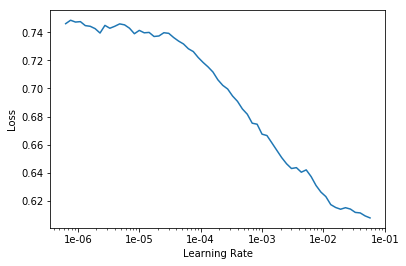

In [13]:
learn.recorder.plot(skip_end=20)

In [0]:
learn.fit(2,1e-02)

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [21]:
learn.show_results(rows=10)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target,prediction
-0.5480,-0.1569,1.0705,-0.0994,-0.0821,-0.8563,-0.4787,-1.0427,0,0
-0.2502,-1.1986,0.1431,0.7273,-0.6862,0.6414,-0.6153,-0.4395,0,0
0.6434,-3.8501,-0.0630,1.2996,-0.6862,0.8661,0.7503,0.6807,1,0
0.9413,-0.8829,-0.2691,0.2822,-0.0141,0.1546,0.7829,0.6807,0,0
-0.2502,-0.8198,0.4522,1.1724,-0.6862,0.6539,-0.7013,0.5946,0,0
1.8349,-1.4827,0.6583,-1.3076,-0.6862,0.1546,-0.6271,0.4222,0,0
-1.1437,1.8318,1.0705,0.3457,0.0795,0.5540,-0.4757,0.1637,1,1
-0.8459,0.2535,-0.4752,0.1550,0.7601,-0.4320,0.6464,-1.0427,0,0
-0.5480,-1.1986,-0.9904,0.1550,-0.0396,-0.2073,1.4657,-1.0427,0,0
1.2392,-0.0622,0.4522,-1.3076,-0.6862,-0.8813,-0.1937,2.6627,0,0


In [0]:
interpret=ClassificationInterpretation.from_learner(learn)

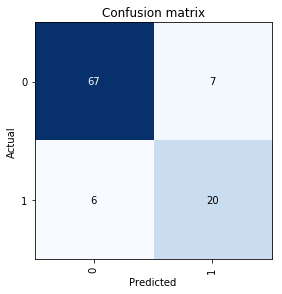

In [23]:
interpret.plot_confusion_matrix()

In [0]:
learn.export('diabetes.pkl')